# Univariate Selection

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
data = pd.read_csv("mobile_price_train_data.csv")

In [5]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,...,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,...,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,...,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,...,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,...,294,1233,1069,18,6,14,1,0,0,0


In [6]:
X = data.iloc[:, 0:20]
Y = data.iloc[:, -1]

In [7]:
X

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,0,742,0,2.2,1,4,0,56,0.2,190,7,14,577,1359,3557,16,11,12,0,1
1,1,1509,0,0.6,1,5,0,50,0.3,81,4,8,1010,1684,1540,12,8,3,1,1
2,2,641,1,1.1,0,0,1,7,0.9,192,1,3,417,759,3595,7,5,19,1,1
3,3,733,1,0.6,1,0,0,63,0.3,105,7,10,950,1739,984,17,4,9,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,2,0,294,1233,1069,18,6,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,667,1,0.6,0,6,1,3,0.7,185,6,13,13,1463,2855,5,0,19,1,0
1796,1796,1595,1,2.6,0,7,0,12,0.3,121,8,19,344,655,3608,15,1,16,0,1
1797,1797,1641,0,1.1,0,6,0,48,0.7,97,8,7,224,1994,1695,13,6,17,1,0
1798,1798,1913,1,1.8,0,0,0,29,0.6,111,5,4,675,742,2023,17,13,8,1,1


In [8]:
Y

0       3
1       1
2       2
3       0
4       0
       ..
1795    2
1796    3
1797    2
1798    2
1799    3
Name: price_range, Length: 1800, dtype: int64

In [9]:
#Apply selectKbest
#pick top 10 features

In [10]:
best_features = SelectKBest(score_func=chi2, k=10)

In [12]:
fit = best_features.fit(X,Y)

In [13]:
fit.scores_

array([1.69923092e+03, 1.22663687e+04, 5.73949175e-01, 6.32639754e-01,
       4.23764300e-01, 1.19325910e+01, 1.32205795e+00, 9.68292655e+01,
       9.02456488e-01, 8.13062001e+01, 6.83368150e+00, 8.51148555e+00,
       1.63470084e+04, 8.56890823e+03, 8.42641278e+05, 6.84433681e+00,
       7.30013506e+00, 2.44450767e+01, 1.15343614e-01, 2.02536210e+00])

In [14]:
dfscores = pd.DataFrame(fit.scores_)

In [15]:
dfscores

,0
0,1699.230916
1,12266.368724
2,0.573949
3,0.632640
4,0.423764
5,11.932591
6,1.322058
7,96.829265
8,0.902456
9,81.306200


In [17]:
dfcolumns = pd.DataFrame(X.columns)

In [18]:
dfcolumns

,0
0,id
1,battery_power
2,blue
3,clock_speed
4,dual_sim
5,fc
6,four_g
7,int_memory
8,m_dep
9,mobile_wt


In [21]:
#then we will concat both dfscores and dfcolumns
feature_scores = pd.concat([dfcolumns,dfscores], axis=1)

In [23]:
feature_scores.columns = ['Features', 'Scores']

In [24]:
feature_scores

,Features,Scores
0,id,1699.230916
1,battery_power,12266.368724
2,blue,0.573949
3,clock_speed,0.632640
4,dual_sim,0.423764
5,fc,11.932591
6,four_g,1.322058
7,int_memory,96.829265
8,m_dep,0.902456
9,mobile_wt,81.306200


In [26]:
sorted_features = feature_scores.sort_values(by='Scores', ascending=False)

In [27]:
sorted_features

,Features,Scores
14,ram,842641.278323
12,px_height,16347.008438
1,battery_power,12266.368724
13,px_width,8568.908228
0,id,1699.230916
7,int_memory,96.829265
9,mobile_wt,81.306200
17,talk_time,24.445077
5,fc,11.932591
11,pc,8.511486


In [28]:
k_best_features = sorted_features.iloc[0:10, :]

In [29]:
k_best_features

,Features,Scores
14,ram,842641.278323
12,px_height,16347.008438
1,battery_power,12266.368724
13,px_width,8568.908228
0,id,1699.230916
7,int_memory,96.829265
9,mobile_wt,81.306200
17,talk_time,24.445077
5,fc,11.932591
11,pc,8.511486


In [30]:
#here we have sorted the k best features out of all features by chi square method(k = 10)

In [35]:
#drawing the bar graph
import matplotlib.pyplot as plt

In [42]:
k_best_features_df = pd.DataFrame(k_best_features)

In [43]:
x = k_best_features_df.iloc[:,0]
y = k_best_features_df.iloc[:,-1]

<BarContainer object of 10 artists>

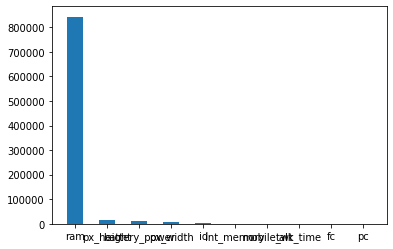

In [50]:
plt.bar(x,y, width=0.5)